<a href="https://colab.research.google.com/github/zum-m/jouhougakugairon/blob/quantium/quantum%E6%BC%94%E7%BF%92%E7%AC%AC2%E5%9B%9E_2111142001miura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.量子ビットの可視化と単一量子ビットゲート**


##**2.1 演習のための準備**
以下のコードを実行し、qiskitをインストールしましょう。

In [ ]:
pip install qiskit==0.39.4

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.4/37.4 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.7/929.7 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.8/129.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 10.4 MB/s eta 0:0

さらに以下のコードを実行して、Qiskitによる学習を支援するライブラリーqiskit-textbookと量子回路を描画するためのライブラリーpylatexencもインストールします。

In [ ]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-metye0sl
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-metye0sl
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.7 MB/s eta 0:00:00
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17522 sha256=04d2111706f8f57b992d76c9398bbbbc393ccff78040540b979817eec22b9ebc
  Stored in directory: /tmp/pip-ephem-wheel-cache-bnwmnk_l/wheels/a4/af/1e/358474758f89b7223d73e3a3b05d32a15554fede054868448c
Successfully built qiskit-textbook


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=0f60711e0267f15e64aeaa53facda9956ea48846d28fa609796a8d0241a36138
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


演習で使用するパッケージをqiskitライブラリーからimportします。  
以下のコードを実行しましょう。  


In [ ]:
#QuntrumCircuitは量子回路を可視化するためのパッケージ
# assemble、Aerは量子回路シミュレーションのためのパッケージ
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi
sim = Aer.get_backend('aer_simulator')

##***2.2 ブロッホ球による量子ビット状態の表現***
量子ビットの状態は一般的に長さ1の2次元複素ベクトル
$$|q\rangle=\cos\frac{\theta}{2}|0\rangle +e^{i\phi} \sin\frac{\theta}{2}|1\rangle=\left(\begin{array}{c}\cos\frac{\theta}{2}\\ e^{i\phi} \sin\frac{\theta}{2}\end{array}\right)$$
の形式で与えらます。  
この「状態ベクトル」による表現の他に、量子ビットの状態は原点を中心とする半径１の球面上の点で表現されることがあります。  
(ブロッホ球による表現) その点の球面座標は$(\theta, \phi, 1)$です。
* $\theta$は点と原点を結ぶ線分とz軸正の方向がなす角
* $\phi$は点からｚ軸に結ぶ垂線がx軸正の方向となす角

を意味します。  
例えば状態ベクトル
$$|q\rangle=\frac{1}{\sqrt2}|0\rangle + \frac{1}{\sqrt2}|1\rangle=\left(\begin{array}{c}\frac{1}{\sqrt2}\\ \frac{1}{\sqrt2}\end{array}\right)$$
に対応したブロッホ球上の点は($\pi/2$,0,1)の座標をもちます。

qiskit_texbookにはブロッホ球による表現を描画するツールが組み込まれています。
以下のコードを実行してみましょう。
```
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # 球面座標を持つブロッホベクトル
```

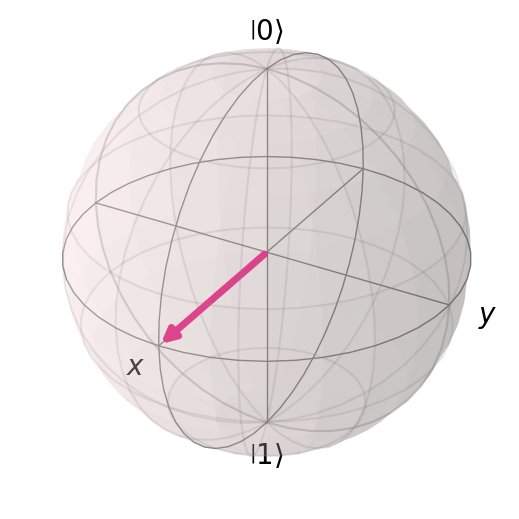

In [ ]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # 球面座標を持つブロッホベクトル

上図の矢印はz軸正の方向と反時計回りに$\pi/2$の角をなしています。  
またx軸正の方向となす角はゼロです。

##***2.3 単一量子ビットゲート***
量子コンピューティングのためには、量子ビットの状態  
$$|q\rangle=\cos\frac{\theta}{2}|0\rangle +e^{i\phi} \sin\frac{\theta}{2}|1\rangle=\left(\begin{array}{c}\cos\frac{\theta}{2}\\ e^{i\phi} \sin\frac{\theta}{2}\end{array}\right)$$
をコントロール(制御)することが求められます。  
つまりブロッホ球面上の点の位置を自由に操作できなくてはいけません。  

単一の量子ビットに適用されるゲートを単一量子ビットゲートと呼びます。  
ここでは量子ビットの自由な操作を可能にするいくつかの重要な単一量子ビットゲートを紹介します。

### **2.3.1 Xゲート（NOTゲート）**


Xゲートは、パウリ-X行列で表されます。
$$X=\begin{bmatrix}0 & 1 \\1 &0 \end{bmatrix}=|0⟩⟨1|+|1⟩⟨0|$$

 Xゲートは$|0⟩$を$|1⟩$に、$|1⟩$を$|0⟩$に切り替えます。
 $$X|0⟩=|1⟩,\ X|1⟩=|0⟩$$

この作用をブロッホ球の表現を用いて理解しましょう。  
まず、1量子ビットにXゲートを適用した簡単な量子回路を作成します。
```
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')
```

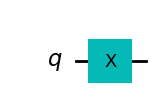

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

以下のコードによりXゲートを通過した後の量子ビットの状態を  
ブロッホ球面上の点で確認することができます。
```
# 結果を見てみましょう
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)
```

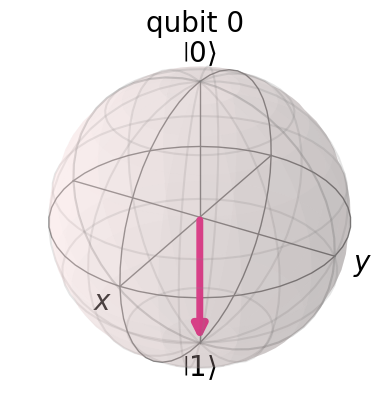

In [ ]:
# 結果を見てみましょう
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

量子ビットの状態は最初ブロッホ球面の北極点に位置していましたが、  
Xゲートを適用後、南極点に移動しました。  
この作用を「球面上の点がｘ軸を中心に反時計回りに$π$だけ回転した」と理解します。

### **2.3.2 Y,Zゲート**
Y,Zゲートは、パウリ-YおよびZ行列に対応した単一量子ビットゲートです。
$$Y=\begin{bmatrix}0 &-i \\i &0 \end{bmatrix}=-i|0⟩⟨1|+i|1⟩⟨0|$$
$$Z=\begin{bmatrix}1 &0 \\0 &-1 \end{bmatrix}=|0⟩⟨0|-|1⟩⟨1|$$
Y,Zゲートは量子ビット状態に対応したブロッホ球面上の点をそれぞれ  
y軸とz軸を中心に$\pi$だけ回転させる作用をうみます。

Xゲート同様、Y,Zゲートも以下のコードにより量子回路に組み込むことができます。
```
qc = QuantumCircuit(1)
qc.y(0) # 量子ビット0にYゲートを適用します。
qc.z(0) # 量子ビット0にZゲートを適用します。
qc.draw('mpl')
```

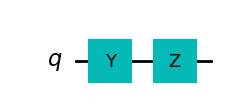

In [ ]:
qc = QuantumCircuit(1)
qc.y(0) # 量子ビット0にYゲートを適用します。
qc.z(0) # 量子ビット0にZゲートを適用します。
qc.draw('mpl')


量子コンピューティングの学習を支援するパッケージ「qiskit_textbook」には  
ブロッホ球で量子ビットの状態を表示する教材ウィジェットがあります。   
ここではこのウィジェットを用いて、Y,Zゲートの作用を確認しましょう。   
以下のコードによりウィジェットを呼び出します。
```
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')
```

In [ ]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

ウィジェットにおいて、量子ビットの初期状態は北極点にあります。  
まず「Z」のボタンを押し、Zゲートを適用しましょう。  
すると点の位置に変化がないことが分かります。  
Zゲートは点をZ軸周りに$π$だけ回転させる作用であるためです。  
次に「Y」のボタンを押しましょう。  
すると点は南極点に移ります。  
Yゲートの作用により、点がy軸周りに$π$だけ回転したためです。  
初期状態が$|0⟩$(北極点)にある限り、どんなにX,Y,Zゲートを作用させても  
点は北極点と南極点を行き来するだけです。  
点を「赤道上」に移動させるにはどのようなゲートが必要でしょうか。


### **2.3.3 アダマールゲート（Hゲート）**
アダマールゲート（Hゲート）は行列
$$H=\frac{1}{\sqrt2}\begin{bmatrix}1 &1 \\1 &-1 \end{bmatrix}=\frac{1}{\sqrt2}\left(|0⟩⟨0|+|0⟩⟨1|+|1⟩⟨0|-|1⟩⟨1|\right)$$
に対応した単一量子ビットゲートです。  
行列Hが$|0⟩$, $|1⟩$に作用すると、
$$H|0⟩=\frac{1}{\sqrt2}|0⟩+\frac{1}{\sqrt2}|1⟩=|+⟩$$
$$H|1⟩=\frac{1}{\sqrt2}|0⟩-\frac{1}{\sqrt2}|1⟩=|-⟩$$
となります。ベクトル$|+⟩$はブロッホ球面x軸上の(1,0,0)の点、  
 ベクトル$|-⟩$はブロッホ球面x軸上の(-1,0,0)の点に対応します。  
Hは球面上の点をx軸とz軸の間の直線を中心に$\pi$だけ回転させる作用をうみます。

以下のコードによりウィジェットを呼び出し、このことを確認しましょう。
```
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')
```

In [ ]:
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

初期状態は北極点にあります。まず「H」のボタンを押してHゲートを適用してみましょう。  
点は赤道上の点、(x,y,z)=(1,0,0)に移動しましたね。この点は状態$|+⟩$に対応します。  
もう一度「H」のボタンを押すと元の位置(北極点)に移ります。  
Hは球面上の点をx軸とz軸の間の直線を中心に$\pi$だけ回転させる作用をうみます。  
Hを二回作用させたので、点は元に戻ったのです。  
次に「X」か「Y」ボタンを押して、点を南極点($|1⟩$)に移します。  
さらに「H」ボタンを押しましょう。点は(x,y,z)=(-1,0,0)に移ります。
この点は状態$|-⟩$に対応します。

### **2.3.4 Pゲート（位相ゲート）、I ゲート、Sゲート、Tゲート**
ここまでで、X,Y,ZゲートとアダマールゲートHの単一量子ビットゲートを紹介しました。  
量子ビット状態を自由にコントロールするには、これらゲートの組み合わせだけでは不十分です。

ここで登場するのが Pゲート(位相ゲート)です。Pゲートは行列
$$P=\begin{bmatrix}1 &0 \\0 &e^{i\phi'} \end{bmatrix}=|0⟩⟨0|+e^{i\phi'}|1⟩⟨1|$$
に対応し、ブロッホ球面上の点をｚ軸を中心に反時計回りに$\phi'$回転させる作用を生みます。  
回転角$\phi'$は自由に設定できます。

以下のコードによりウィジェットをを呼び出し、Pゲートの作用を確認しましょう。
```
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')
```

In [ ]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

初期状態はブロッホ球面上の北極点にあります。  
まず「H」ボタンにより、点をx軸上の(1,0,0)の点に移しましょう。  
「P」ボタンの横にあるスライダーにより、$\phi'$の値($-\pi$から$\pi$の値)を自由に設定することができます。  
$\phi'$を適当な値に決めてから「P」ボタンを押して作用を確認しましょう。  
Pゲートにより点はブロッホ球面の赤道上を自由に移動することが分かります。

Pゲートを量子回路に適用するコードは以下の通りです。
```
qc = QuantumCircuit(1)
qc.p(pi/4, 0)#最初の引数で回転角を設定する
qc.draw('mpl')
```

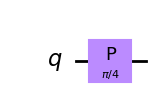

In [ ]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)#最初の引数で回転角を設定する
qc.draw('mpl')

Pゲートの回転角$\phi'$を特定の値に設定したゲートには特別な名称があります。  
* $\phi'=0$のとき、行列Pは単位行列
$$I=\begin{bmatrix}1 &0 \\0 &1 \end{bmatrix}$$
に一致します。これをI ゲートと呼びます。  
Iゲートは量子ビットに何の影響も及ぼしません。
つまり何もしないゲートです。  

* $\phi'=\pi$のとき、行列Pは行列
$$Z=\begin{bmatrix}1 &0 \\0 &-1 \end{bmatrix}$$
に一致します。つまりZゲートと同じです。

* $\phi'=\pi/2$ または $-\pi/2$のとき、行列Pは行列
$$S=\begin{bmatrix}1 &0 \\0 &e^{i\pi/2} \end{bmatrix},\ S^†=\begin{bmatrix}1 &0 \\0 &e^{-i\pi/2} \end{bmatrix}$$
に一致します。「$S^†$」は「えすだがー」と読みます。それぞれを$S$ゲート、$S^†$ゲートと呼びます。  
 $S$を二回作用させると$Z$ゲートの作用と同じになります。つまり$SS=Z$です。   
以下のコードで量子回路に組み込むことができます。
```
qc = QuantumCircuit(1)
qc.s(0)   # Sゲートを量子ビット0に適用します。
qc.sdg(0) # Sdgゲートを量子ビット0に適用します。
qc.draw('mpl')
```

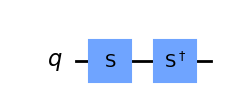

In [ ]:
qc = QuantumCircuit(1)
qc.s(0)   # Sゲートを量子ビット0に適用します。
qc.sdg(0) # Sdgゲートを量子ビット0に適用します。
qc.draw('mpl')

* $\phi'=\pi/4$ または $-\pi/4$のとき、行列Pは行列
$$T=\begin{bmatrix}1 &0 \\0 &e^{i\pi/4} \end{bmatrix},\ T^†=\begin{bmatrix}1 &0 \\0 &e^{-i\pi/4} \end{bmatrix}$$
に一致します。それぞれを$T$ゲート、$T^†$ゲートと呼び、  
以下のコードで量子回路に組み込むことができます。
```
qc = QuantumCircuit(1)
qc.t(0)   # Tゲートを量子ビット0に適用します。
qc.tdg(0) # Tdgゲートを量子ビット0に適用します。
qc.draw('mpl')
```

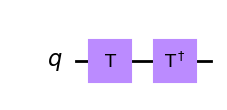

In [ ]:
qc = QuantumCircuit(1)
qc.t(0)   # Tゲートを量子ビット0に適用します。
qc.tdg(0) # Tdgゲートを量子ビット0に適用します。
qc.draw('mpl')

### **2.3.5 単一量子ビットゲートによる操作**
以上の単一量子ビットゲートにより、量子ビットを自由に制御することができます。  
つまり、状態をブロッホ球面上の任意の位置に動かすことができます。

以下のコードによってウィジェットを呼び込み、このことを確認しましょう。
```
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo('mpl')
```

In [ ]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo('mpl')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

初期状態（北極点）から始めて、まずは「H」を押してみましょう。  
状態はx軸上に移りましたね。次に「T」を押してみましょう。  
状態はz軸上に反時計回りに$\pi/4$だけ回転します。次に「H」を押します。  
移った先の状態に注目してください。  
この位置は結果的に初期状態からx軸を中心に$\pi/4$だけ回転した位置に一致します。  
さらに「S」を押してみましょう。  
こんどは初期状態からｙ軸を中心に$\pi/4$だけ回転した位置に一致します。  
つまり単一量子ビットの組み合わせて、x,y軸まわりの回転を実現することで、  
量子ビットの自由な操作が可能となります。

上記の操作を量子回路で表現します。
```
#y軸まわりのpi/4回転をおこなう量子回路
qc = QuantumCircuit(1)
qc.h(0)  
qc.t(0)
qc.h(0)
qc.s(0)
qc.draw('mpl')
```

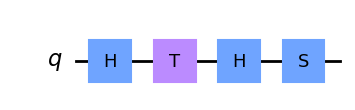

In [ ]:
# y軸まわりのpi/4回転をおこなう量子回路
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.s(0)
qc.draw('mpl')


## **演習課題02**

### 問題
初期状態が$|0⟩$の量子ビットを以下のブロッホ球面上の位置に移す量子回路を作成せよ。  
(a) ($\theta, \phi$)=($\pi/4, \pi/4$)  
(b) ($\theta, \phi$)=($3\pi/4, \pi/4$)

**解答**

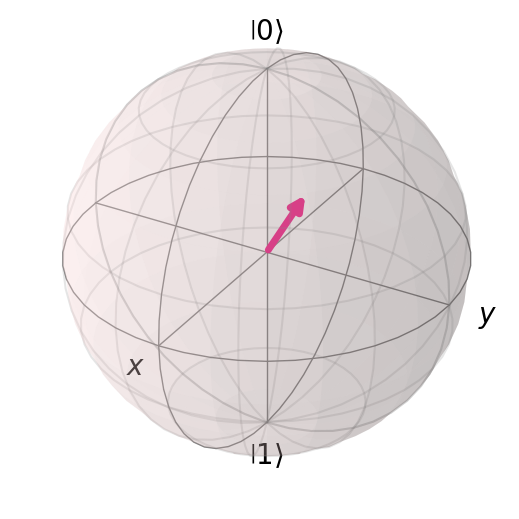

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_vector
import numpy as np  # NumPyをインポート


# 初期化
qc = QuantumCircuit(1)

# ブロッホ球上の位置 (𝜃, 𝜙) = (𝜋/4, 𝜋/4) に移す操作
theta = np.pi/4
phi = np.pi/4

# RyゲートでY軸周りに𝜃回転
qc.rx(theta, 0)

# RzゲートでZ軸周りに𝜙回転
qc.rz(phi, 0)

# 量子回路をシミュレート
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
statevector = result.get_statevector()

# ブロッホ球上の位置を可視化
plot_bloch_vector([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])


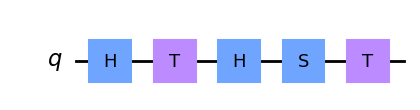

In [ ]:
# y軸まわりのpi/4回転をおこなう量子回路
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.s(0)
qc.t(0)

qc.draw('mpl')


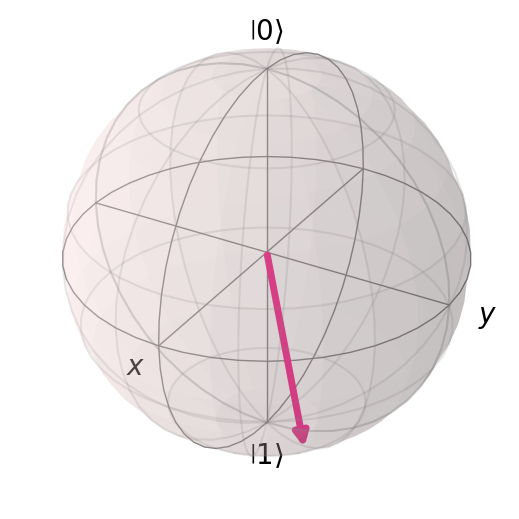

In [ ]:
#対応する位置

# 初期化
qc = QuantumCircuit(1)

# ブロッホ球上の位置 (𝜃, 𝜙) = (3𝜋/4, 𝜋/4) に移す操作
theta = 3*np.pi/4
phi = np.pi/4

# X軸周りの回転
qc.rx(theta, 0)

# Z軸周りの回転
qc.rz(phi, 0)

# 量子回路をシミュレート
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
statevector = result.get_statevector()

# ブロッホ球上の位置を可視化
plot_bloch_vector([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])


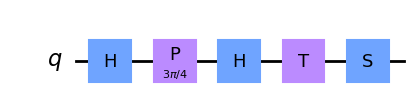

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.p(3*np.pi/4,0)
qc.h(0)
qc.t(0)
qc.s(0)


qc.draw('mpl')


In [ ]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo('mpl')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…